In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import json
import os

base_path = "../data/external/joke-dataset-master"
filenames = ('reddit_jokes.json', 'stupidstuff.json', 'wocka.json')
data_files = [os.path.join(base_path, fname) for fname in filenames]


for fname in data_files:
    with open(fname) as fp:
        data = json.load(fp)
    print("Data from %s: %d" % (os.path.basename(fname), len(data)))
    print("Example:", json.dumps(data[0], indent=2))

Data from reddit_jokes.json: 194553
Example: {
  "score": 1,
  "body": "Now I have to say \"Leroy can you please paint the fence?\"",
  "id": "5tz52q",
  "title": "I hate how you cant even say black paint anymore"
}
Data from stupidstuff.json: 3773
Example: {
  "body": "A blackjack dealer and a player with a thirteen count in his hand\nwere arguing about whether or not it was appropriate to tip the\ndealer.\n\nThe player said, \"When I get bad cards, it's not the dealer's fault.\nAccordingly, when I get good cards, the dealer obviously had nothing\nto do with it so, why should I tip him?\"\n\nThe dealer said, \"When you eat out do you tip the waiter?\"\n\n\"Yes.\"\n\n\"Well then, he serves you food, I'm serving you cards, so you should\ntip me.\"\n\n\"Okay, but, the waiter gives me what I ask for. I'll take an eight.\"",
  "rating": 2.63,
  "id": 1,
  "category": "Children"
}
Data from wocka.json: 10019
Example: {
  "body": "What do you call a cow with no legs?\r\n\r\nGround Beef!",
  

In [2]:
# Let's augment each data point with information about its source. This will make it easier to check stats by filtering on this source
import pandas as pd
frames = []
for fname in data_files:
    frames.append(pd.read_json(fname))
    
df = pd.concat(frames, ignore_index=True)


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

df['length'] = df.apply(lambda row: len(row.get('body', ''))+len(str(row.get('title', ''))), axis=1)

Quantiles
      rating   score   length
0.25    2.33     0.0    68.00
0.50    3.09     3.0    98.00
0.90    5.00    94.0   741.00
0.95    5.00   260.0  1099.00
0.99    5.00  2193.0  2096.56


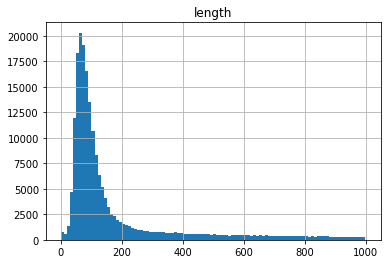

In [14]:
# Quantiles
print("Quantiles")
print(df.quantile([0.25, 0.5, 0.9, 0.95, 0.99]))

df.query('length<1000').hist(column='length', bins=100)
gte1000 = len(df.query('length>=1000'))

In [21]:
small = df.query('length<200')
small.head(30)
print(len(small))

153099
